In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [104]:
df = pd.read_csv('fraudloanpredection.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Statistical information

In [105]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Attribute information

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Checking and treating null values

In [107]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [108]:
# Filling numerical columns
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [109]:
# Filling categorical columns
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [110]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualizing Categorical Attributes

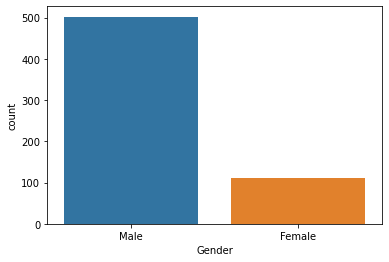

In [111]:
sns.countplot(df['Gender'])

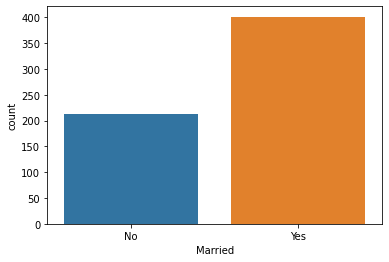

In [112]:
sns.countplot(df['Married'])

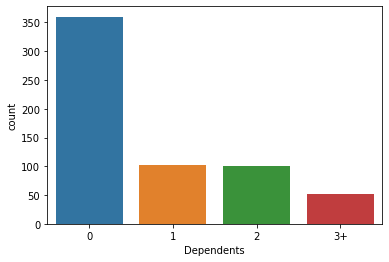

In [113]:
sns.countplot(df['Dependents'])

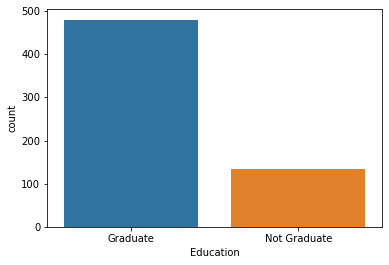

In [114]:
sns.countplot(df['Education'])

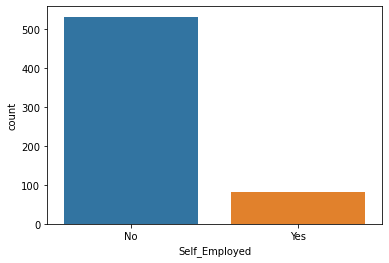

In [115]:
sns.countplot(df['Self_Employed'])

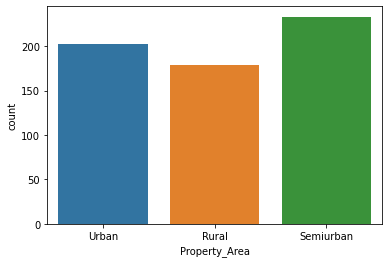

In [116]:
sns.countplot(df['Property_Area'])

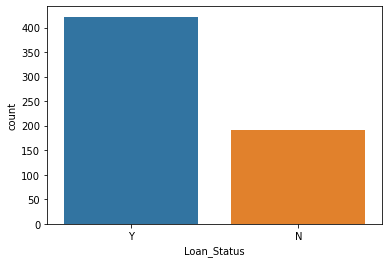

In [117]:
sns.countplot(df['Loan_Status'])

# Visualizing numerical Attributes

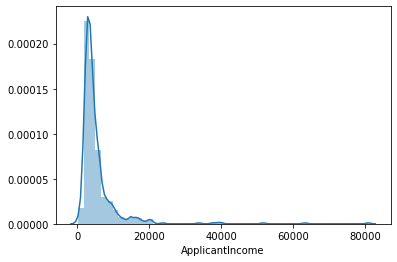

In [118]:
# Normalizing ApplicantIncome
sns.distplot(df['ApplicantIncome'])

In [119]:
# Apply log transformation to normalize
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

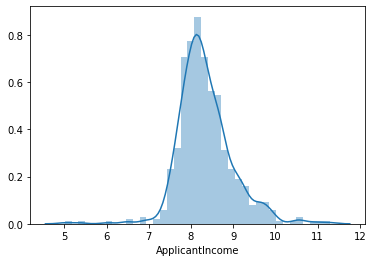

In [120]:
sns.distplot(df['ApplicantIncome'])

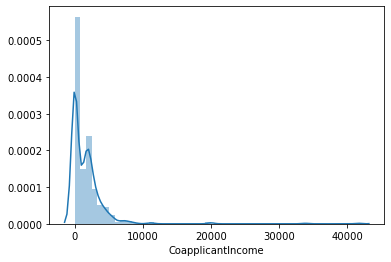

In [121]:
# Normalizing CoaplicantIncome
sns.distplot(df['CoapplicantIncome'])

In [122]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean())

In [123]:
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])

C:\Users\Prashant\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\Prashant\anaconda3\lib\site-packages\seaborn\distributions.py:35: RuntimeWarning: invalid value encountered in double_scalars
  return int(np.ceil((a.max() - a.min()) / h))


ValueError: cannot convert float NaN to integer

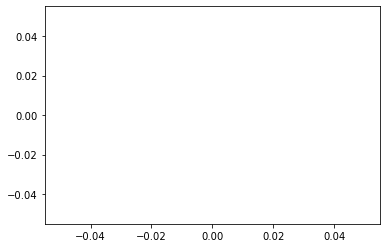

In [124]:
sns.distplot(df['CoapplicantIncome'])

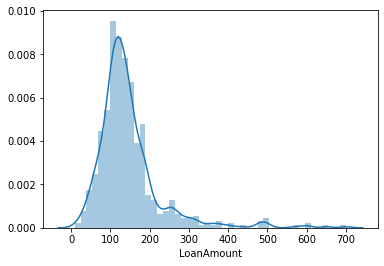

In [125]:
# NOrmalizing Loan Amount
sns.distplot(df['LoanAmount'])

In [126]:
df['LoanAmount'] = np.log(df['LoanAmount'])

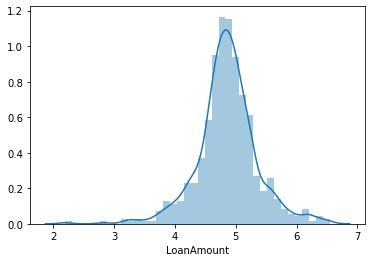

In [127]:
sns.distplot(df['LoanAmount'])

C:\Users\Prashant\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


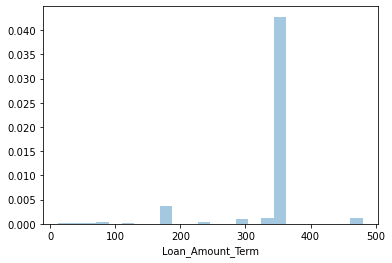

In [128]:
# Normalizing Lona amount team
sns.distplot(df['Loan_Amount_Term'])

In [129]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])

C:\Users\Prashant\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


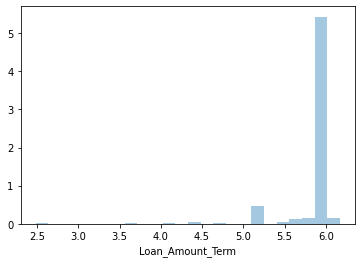

In [130]:
sns.distplot(df['Loan_Amount_Term'])

C:\Users\Prashant\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


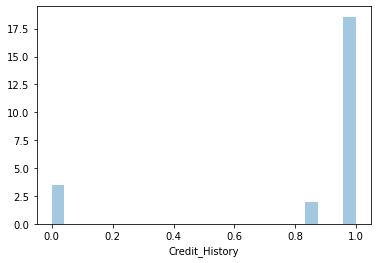

In [131]:
sns.distplot(df['Credit_History'])

# Creation of new attributes

In [132]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [133]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674026,-inf,4.986426,5.886104,1.0,Urban,Y,-inf
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,1.0,Rural,N,15.748649
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,-inf,4.189655,5.886104,1.0,Urban,Y,-inf
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,1.0,Urban,Y,15.622276
4,LP001008,Male,No,0,Graduate,No,8.699515,-inf,4.948760,5.886104,1.0,Urban,Y,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,7.972466,-inf,4.262680,5.886104,1.0,Rural,Y,-inf
610,LP002979,Male,Yes,3+,Graduate,No,8.320205,-inf,3.688879,5.192957,1.0,Rural,Y,-inf
611,LP002983,Male,Yes,1,Graduate,No,8.996157,5.480639,5.533389,5.886104,1.0,Urban,Y,14.476795
612,LP002984,Male,Yes,2,Graduate,No,8.933664,-inf,5.231109,5.886104,1.0,Urban,Y,-inf


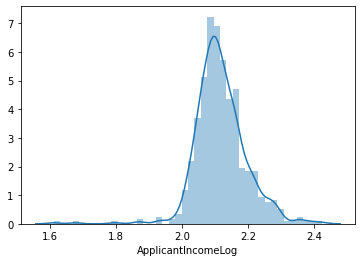

In [134]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

C:\Users\Prashant\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


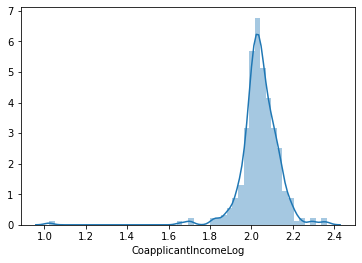

In [135]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.distplot(df['CoapplicantIncomeLog'])

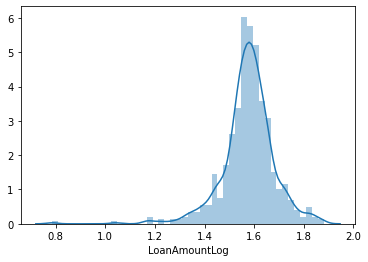

In [136]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

C:\Users\Prashant\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


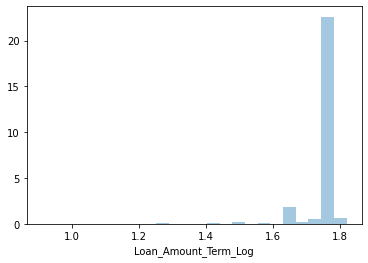

In [137]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_Log'])

C:\Users\Prashant\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


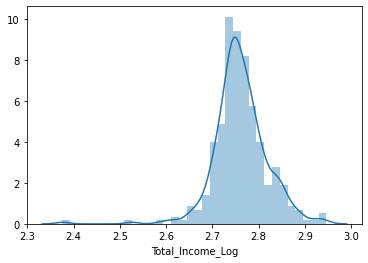

In [138]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income_Log'])

# Correlation Matrix

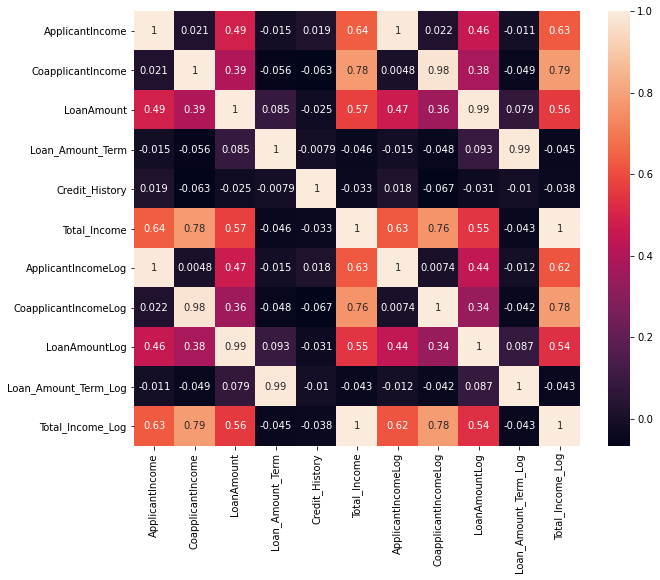

In [139]:
corr = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True)

In [140]:
# Drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Total_Income', 'Loan_ID', 'CoapplicantIncomeLog', 'Dependents']
df = df.drop(columns = cols, axis = 1)

In [141]:
df.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,Graduate,No,1.0,Urban,Y,2.160333,1.606719,1.772594,NaN
1,Male,Yes,Graduate,No,1.0,Rural,N,2.131810,1.579397,1.772594,2.756755
2,Male,Yes,Graduate,Yes,1.0,Urban,Y,2.080237,1.432618,1.772594,NaN
3,Male,Yes,Not Graduate,No,1.0,Urban,Y,2.061368,1.566007,1.772594,2.748698
4,Male,No,Graduate,No,1.0,Urban,Y,2.163267,1.599137,1.772594,NaN


# Label Encoding

In [142]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [143]:
df

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,1.0,2,1,2.160333,1.606719,1.772594,NaN
1,1,1,0,0,1.0,0,0,2.131810,1.579397,1.772594,2.756755
2,1,1,0,1,1.0,2,1,2.080237,1.432618,1.772594,NaN
3,1,1,1,0,1.0,2,1,2.061368,1.566007,1.772594,2.748698
4,1,0,0,0,1.0,2,1,2.163267,1.599137,1.772594,NaN
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,1.0,0,1,2.075994,1.449898,1.772594,NaN
610,1,1,0,0,1.0,0,1,2.118687,1.305323,1.647303,NaN
611,1,1,0,0,1.0,2,1,2.196797,1.710801,1.772594,2.672547
612,1,1,0,0,1.0,2,1,2.189827,1.654623,1.772594,NaN


# Train Test Split

In [149]:
X = df.drop(columns = ['Loan_Status', 'Total_Income_Log'], axis = 1)
y = df['Loan_Status']

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Model Training

In [151]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    model.fit(X_train, y_train)
    print("Accuracy is", model.score(X_test, y_test)*100)
    score = cross_val_score(model, x, y, cv = 5)
    print("cross validation is, ", np.mean(score)*100)

In [152]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
cross validation is,  80.9462881514061


In [157]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.27272727272727
cross validation is,  78.17273090763695


In [158]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 73.37662337662337
cross validation is,  74.91803278688525


# Hyperparameter tuning

In [162]:
model = RandomForestClassifier(n_estimators = 25, min_samples_split = 25, max_depth = 7, max_features = 1)
classify(model, X, y)

Accuracy is 77.27272727272727
cross validation is,  80.78501932560309


# Confusion Matrix

In [163]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [164]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 30],
       [ 4, 96]], dtype=int64)

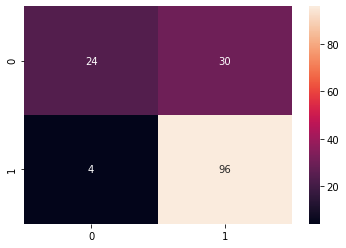

In [166]:
sns.heatmap(cm, annot = True)

In [167]:
(24+96)/(24+96+30+4)

0.7792207792207793

# End of EDA